## Análisis exploratorio de datos + identificación

### Carga de datos

In [5]:
pip install statsmodels

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_csv('/content/pp_m.csv'))
df.columns = ['pp']; df.index = pd.date_range(start = '01/01/1981', end = '12/31/2016', freq = 'm') # columns - index
df_pred = df.loc['01/2011':'12/2011'] # 2010-2011 predicción
df = df.loc['01/1981':'12/2010'] # 1981-2010

### Descomposición de serie de tiempo

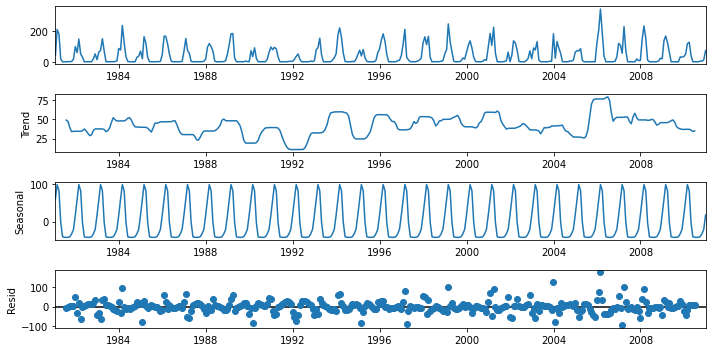

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
d_df = seasonal_decompose(df) 

plt.rcParams["figure.figsize"] = (10,5)
ts_plot = d_df.plot()

### Diferencia finita

In [21]:
diff_1 = df['pp'].diff().dropna()
diff_1s = df['pp'].diff(periods = 12).dropna()
diff_s2 = diff_1s.diff(periods = 12).dropna()

### Correlograma

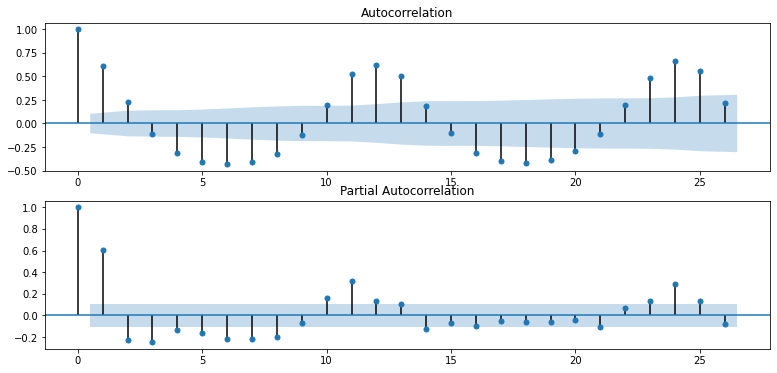

In [16]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, axes = plt.subplots(2,1, figsize = (13,6))
acf = plot_acf(df['pp'], ax = axes[0])
pacf = plot_pacf(df['pp'], ax = axes[1])

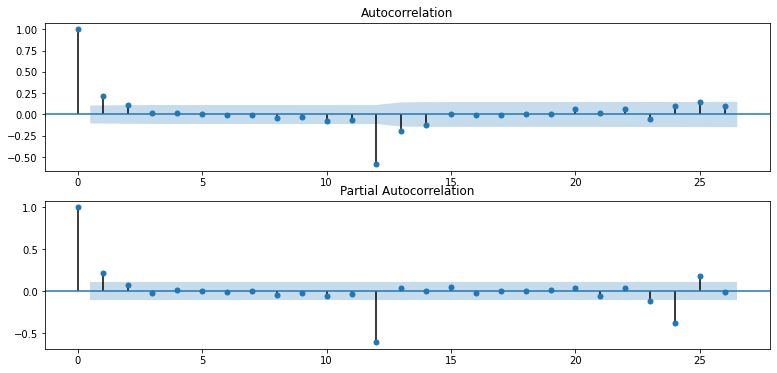

In [19]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, axes = plt.subplots(2,1, figsize = (13,6))
acf = plot_acf(diff_1s, ax = axes[0])
pacf = plot_pacf(diff_1s, ax = axes[1])

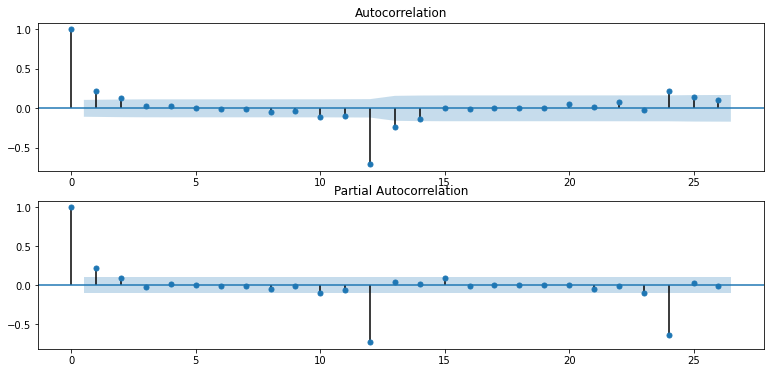

In [22]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig, axes = plt.subplots(2,1, figsize = (13,6))
acf = plot_acf(diff_s2, ax = axes[0])
pacf = plot_pacf(diff_s2, ax = axes[1])

### Estacionalidad: Dickey-Fuller aumentada

In [7]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df['pp'])
print('ADF Statistic: %f' % adf[0])
print('Critical Values:')
for key, value in adf[4].items():
  print('\t%s: %.3f' % (key, value))

print('\np-value: %f' % adf[1])

if adf[1]<0.05: print('La serie de tiempo es estacionaria')
elif adf[1]>0.05: print('La serie de tiempo no es estacionaria')

ADF Statistic: -4.815321
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571

p-value: 0.000051
La serie de tiempo es estacionaria


In [20]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_1s)
print('ADF Statistic: %f' % adf[0])
print('Critical Values:')
for key, value in adf[4].items():
  print('\t%s: %.3f' % (key, value))

print('\np-value: %f' % adf[1])

if adf[1]<0.05: print('La serie de tiempo es estacionaria')
elif adf[1]>0.05: print('La serie de tiempo no es estacionaria')

ADF Statistic: -11.510038
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571

p-value: 0.000000
La serie de tiempo es estacionaria


### Modelo Autoregresivo

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


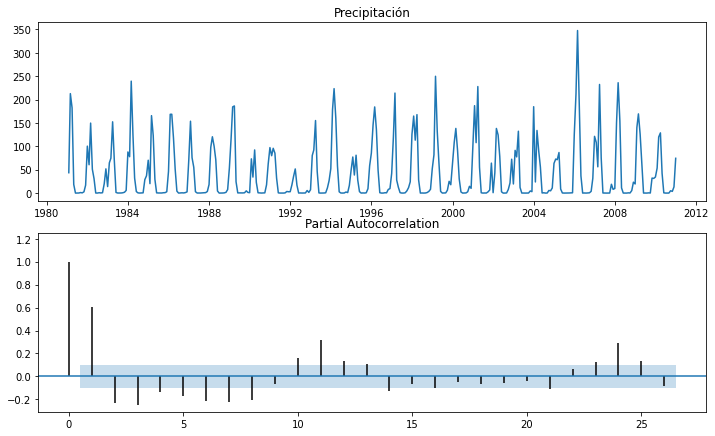

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(2,1, figsize = (10,6))
fig.tight_layout()

axes[0].plot(df['pp'])
axes[0].set_title('Precipitación')
acf = plot_pacf(df['pp'], ax = axes[1], marker = ' ', auto_ylims=True) # escogemos AR de orden 1 (bastón más largo entre los sombreados)

In [ ]:
# AR(1)
from statsmodels.tsa.arima.model import ARIMA

ar_train = pd.DataFrame.copy(df)
ar_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(ar_train.values, order=(1,0,0)) # AR = 1; MA = 0

ar_model = model.fit(); print(ar_model.summary())
ar1_pred = ar_model.predict(start = 1, end = 12) # Un año (12)
ar1_pred = pd.DataFrame(ar1_pred, index = df_pred.index, columns=['pp_ar1'])
print(ar1_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1906.250
Date:                Tue, 19 Oct 2021   AIC                           3818.499
Time:                        05:16:12   BIC                           3830.158
Sample:                             0   HQIC                          3823.135
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7928     10.380      4.026      0.000      21.449      62.137
ar.L1          0.6065      0.039     15.425      0.000       0.529       0.684
sigma2      2324.1836    147.990     15.705      0.0

In [ ]:
# AR(2)
from statsmodels.tsa.arima.model import ARIMA

ar_train = pd.DataFrame.copy(df)
ar_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(ar_train.values, order=(2,0,0)) # AR = 2; MA = 0

ar_model = model.fit(); print(ar_model.summary())
ar2_pred = ar_model.predict(start = 1, end = 12) # Un año (12)
ar2_pred = pd.DataFrame(ar2_pred, index = df_pred.index, columns=['pp_ar2'])
print(ar2_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1896.235
Date:                Tue, 19 Oct 2021   AIC                           3800.470
Time:                        05:16:12   BIC                           3816.014
Sample:                             0   HQIC                          3806.650
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6342      8.383      4.966      0.000      25.204      58.065
ar.L1          0.7508      0.044     17.113      0.000       0.665       0.837
ar.L2         -0.2365      0.046     -5.140      0.0

In [ ]:
# AR(12)
from statsmodels.tsa.arima.model import ARIMA

ar_train = pd.DataFrame.copy(df)
ar_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(ar_train.values, order=(12,0,0)) # AR = 2; MA = 0

ar_model = model.fit(); print(ar_model.summary())
ar12_pred = ar_model.predict(start = 1, end = 12) # Un año (12)
ar12_pred = pd.DataFrame(ar12_pred, index = df_pred.index, columns=['pp_ar12'])
print(ar12_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                ARIMA(12, 0, 0)   Log Likelihood               -1825.214
Date:                Tue, 19 Oct 2021   AIC                           3678.429
Time:                        05:18:38   BIC                           3732.834
Sample:                             0   HQIC                          3700.061
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6019      4.096     10.156      0.000      33.573      49.631
ar.L1          0.4132      0.043      9.698      0.000       0.330       0.497
ar.L2         -0.0357      0.056     -0.639      0.5

In [ ]:
# AR(3)
from statsmodels.tsa.arima.model import ARIMA

ar_train = pd.DataFrame.copy(df)
ar_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(ar_train.values, order=(3,0,0)) # AR = 2; MA = 0

ar_model = model.fit()#; print(ar_model.summary())
ar3_pred = ar_model.predict(start = 1, end = 12) # Un año (12)
ar3_pred = pd.DataFrame(ar3_pred, index = df_pred.index, columns=['pp_ar3'])
#print(ar2_pred)

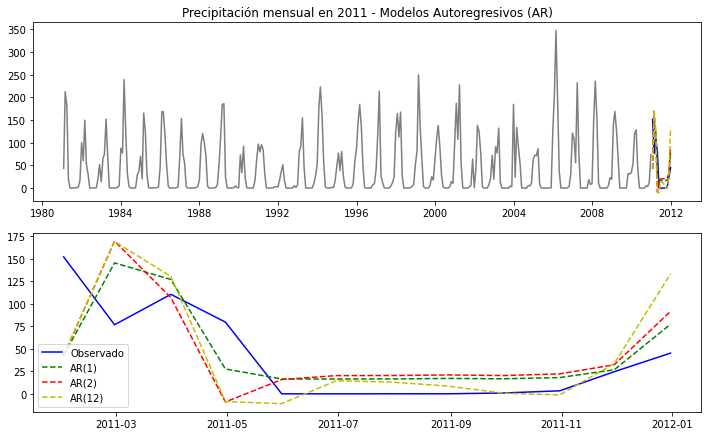

In [ ]:
# Visualización - pronóstico
fig, axes = plt.subplots(2,1, figsize = (10,6))
fig.tight_layout()

axes[0].set_title('Precipitación mensual en 2011 - Modelos Autoregresivos (AR)')
axes[0].plot(df, 'C7')
axes[0].plot(df_pred, 'b-')
axes[0].plot(ar1_pred, 'g--')
axes[0].plot(ar2_pred, 'r--')
axes[0].plot(ar12_pred, 'y--')
axes[1].plot(df_pred, 'b-')
axes[1].plot(ar1_pred, 'g--')
axes[1].plot(ar2_pred, 'r--')
axes[1].plot(ar12_pred, 'y--')
axes[1].legend(['Observado', 'AR(1)', 'AR(2)', 'AR(12)'], loc = 3, ncol = 1)

### Media Móviles

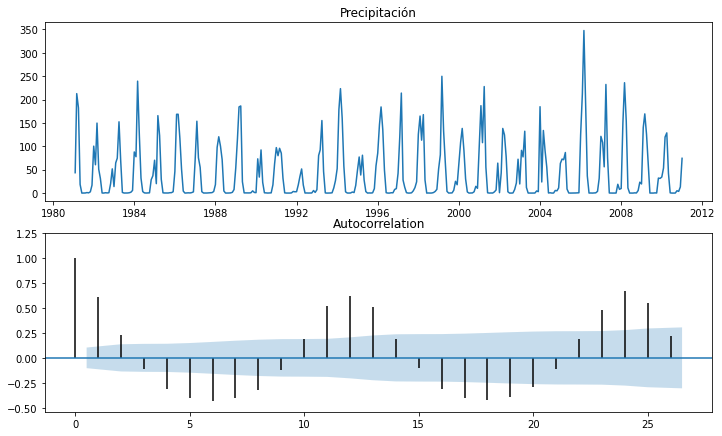

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(2,1, figsize = (10,6))
fig.tight_layout()

axes[0].plot(df['pp'])
axes[0].set_title('Precipitación')
acf = plot_acf(df['pp'], ax = axes[1], marker = ' ', auto_ylims=True) 
# Según la eficiencia depredicción MA de orden 1 (bastón más largo entre los sombreados)

In [ ]:
# MA(1)
from statsmodels.tsa.arima.model import ARIMA

am_train = pd.DataFrame.copy(df)
am_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(am_train.values, order=(0,0,1)) # AR = 0; I = 0; MA = 2

am_model = model.fit(); print(am_model.summary())
am1_pred = am_model.predict(start = 1, end = 12) # Un año (12)
am1_pred = pd.DataFrame(am1_pred, index = df_pred.index, columns=['pp_am1'])
print(am1_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1919.495
Date:                Tue, 19 Oct 2021   AIC                           3844.990
Time:                        05:38:44   BIC                           3856.648
Sample:                             0   HQIC                          3849.626
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6427      6.648      6.264      0.000      28.614      54.672
ma.L1          0.5359      0.042     12.702      0.000       0.453       0.619
sigma2      2502.3633    174.449     14.344      0.0

In [ ]:
# MA(2)
from statsmodels.tsa.arima.model import ARIMA

am_train = pd.DataFrame.copy(df)
am_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(am_train.values, order=(0,0,2)) # AR = 0; I = 0; MA = 2

am_model = model.fit(); print(am_model.summary())
am2_pred = am_model.predict(start = 1, end = 12) # Un año (12)
am2_pred = pd.DataFrame(am2_pred, index = df_pred.index, columns=['pp_am2'])
print(am2_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1896.504
Date:                Tue, 19 Oct 2021   AIC                           3801.008
Time:                        05:16:14   BIC                           3816.552
Sample:                             0   HQIC                          3807.188
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6327      7.831      5.316      0.000      26.284      56.982
ma.L1          0.6714      0.042     16.141      0.000       0.590       0.753
ma.L2          0.3650      0.053      6.843      0.0

In [ ]:
# MA(3)
from statsmodels.tsa.arima.model import ARIMA

am_train = pd.DataFrame.copy(df)
am_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(ar_train.values, order=(0,0,3)) # AR = 0; MA = 2

am_model = model.fit(); print(am_model.summary())
am3_pred = am_model.predict(start = 1, end = 12) # Un año (12)
am3_pred = pd.DataFrame(am3_pred, index = df_pred.index, columns=['pp_am3'])
print(am3_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1893.878
Date:                Tue, 19 Oct 2021   AIC                           3797.756
Time:                        05:16:14   BIC                           3817.187
Sample:                             0   HQIC                          3805.482
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6354      8.991      4.631      0.000      24.013      59.258
ma.L1          0.7168      0.044     16.324      0.000       0.631       0.803
ma.L2          0.4521      0.061      7.359      0.0

In [ ]:
# MA(4)
from statsmodels.tsa.arima.model import ARIMA

am_train = pd.DataFrame.copy(df)
am_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(am_train.values, order=(0,0,4)) # AR = 0; MA = 4

am_model = model.fit(); print(am_model.summary())
am4_pred = am_model.predict(start = 1, end = 12) # Un año (12)
am4_pred = pd.DataFrame(am4_pred, index = df_pred.index, columns=['pp_am4'])
print(am4_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -1893.814
Date:                Tue, 19 Oct 2021   AIC                           3799.628
Time:                        05:16:14   BIC                           3822.945
Sample:                             0   HQIC                          3808.900
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6300      8.935      4.659      0.000      24.118      59.142
ma.L1          0.7110      0.044     16.108      0.000       0.624       0.798
ma.L2          0.4342      0.062      6.949      0.0

In [ ]:
# MA(12)
from statsmodels.tsa.arima.model import ARIMA

am_train = pd.DataFrame.copy(df)
am_pred = pd.DataFrame.copy(df_pred)

model = ARIMA(am_train.values, order=(0,0,4)) # AR = 0; MA = 4

am_model = model.fit(); print(am_model.summary())
am12_pred = am_model.predict(start = 1, end = 12) # Un año (12)
am12_pred = pd.DataFrame(am12_pred, index = df_pred.index, columns=['pp_am12'])
print(am4_pred)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -1893.814
Date:                Tue, 19 Oct 2021   AIC                           3799.628
Time:                        05:45:55   BIC                           3822.945
Sample:                             0   HQIC                          3808.900
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6300      8.935      4.659      0.000      24.118      59.142
ma.L1          0.7110      0.044     16.108      0.000       0.624       0.798
ma.L2          0.4342      0.062      6.949      0.0

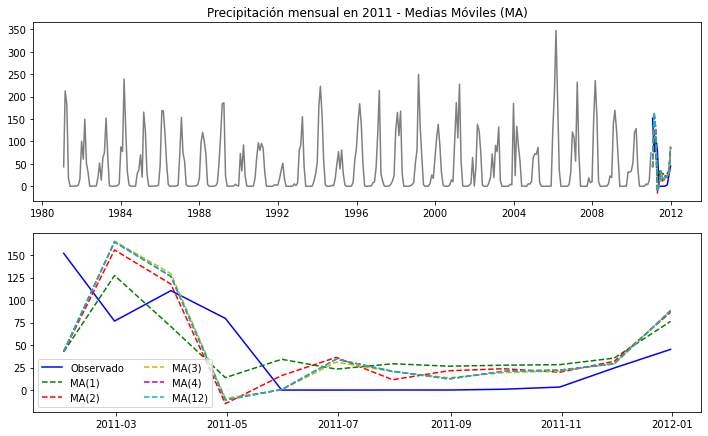

In [ ]:
# Visualización - pronóstico
fig, axes = plt.subplots(2,1, figsize = (10,6))
fig.tight_layout()

axes[0].set_title('Precipitación mensual en 2011 - Medias Móviles (MA)')
axes[0].plot(df, 'C7')
axes[0].plot(df_pred, 'b-')
axes[0].plot(am1_pred, 'g--')
axes[0].plot(am2_pred, 'r--')
axes[0].plot(am3_pred, 'y--')
axes[0].plot(am4_pred, 'm--')
axes[0].plot(am12_pred, 'c--')
axes[1].plot(df_pred, 'b-')
axes[1].plot(am1_pred, 'g--')
axes[1].plot(am2_pred, 'r--')
axes[1].plot(am3_pred, 'y--')
axes[1].plot(am4_pred, 'm--')
axes[1].plot(am12_pred, 'c--')
axes[1].legend(['Observado','MA(1)', 'MA(2)', 'MA(3)', 'MA(4)', 'MA(12)'], loc = 3, ncol = 2)



### ARIMA

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pmd
# https://www.pluralsight.com/guides/advanced-time-series-modeling-(arima)-models-in-python

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, start_d=0, start_q=1,
                              max_P=4, max_D=2, max_Q=4, m = 12,# m (período), 12 (mes), 1 (año), 4(trimestre)
                              test="adf", trace=True, seasonal = True)
    return autoarima_model

In [ ]:
arima_model = arimamodel(df)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3982.130, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3757.391, Time=0.63 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3811.742, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4118.929, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3818.499, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=3677.338, Time=2.57 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=7.39 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=3637.549, Time=8.19 sec
 ARIMA(1,0,0)(4,0,1)[12] intercept   : AIC=inf, Time=14.32 sec
 ARIMA(1,0,0)(3,0,2)[12] intercept   : AIC=inf, Time=10.03 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(1,0,0)(4,0,0)[12] intercept   : AIC=inf, Time

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(1, 0, 0)x(3, 0, [1], 12)   Log Likelihood               -1811.775
Date:                              Tue, 19 Oct 2021   AIC                           3637.549
Time:                                      05:18:30   BIC                           3664.752
Sample:                                           0   HQIC                          3648.366
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.9801      5.412      1.290      0.197      -3.627      17.587
ar.L1          0.2532      0.028      9.076      0.000       0.199       0.308
ar.S.L12      -0.2676      0.092     -2.909      0.004      -0.448      -0.087
ar.S.L24       0.5111      0.043     12.010      0.000       0.428       0.594
ar.S.L36       0.5257      0.046     11.492      0.000       0.436       0.615
ma.S.L12       0.4529      0.100      4.529      0.000       0.257       0.649
sigma2      1291.1879     52.537     24.577      0.000    1188.217    1394.159
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1037.45
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_pred = arima_model.predict(12) # un año
arima_pred = pd.DataFrame(arima_pred, index = df_pred.index, columns=['pp_arima'])
arima_pred

,pp_arima
2011-01-31,136.802837
2011-02-28,197.869376
2011-03-31,112.149920
2011-04-30,36.800994
2011-05-31,6.597480
2011-06-30,6.469551
2011-07-31,6.453975
2011-08-31,6.805353
2011-09-30,7.586024
2011-10-31,20.094743


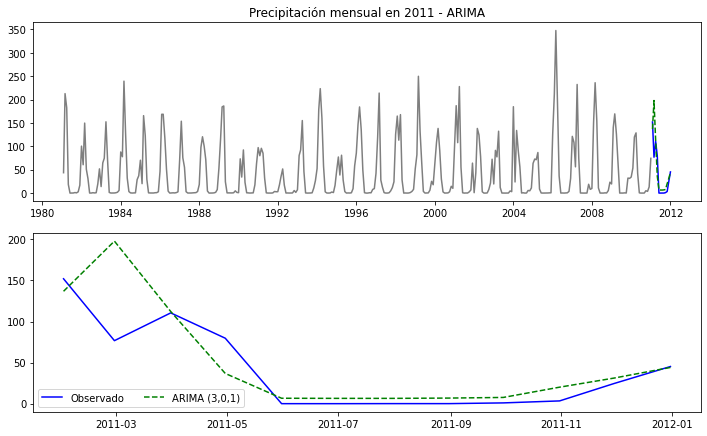

In [ ]:
# Visualización - pronóstico
fig, axes = plt.subplots(2,1, figsize = (10,6))
fig.tight_layout()

axes[0].set_title('Precipitación mensual en 2011 - ARIMA')
axes[0].plot(df, 'C7')
axes[0].plot(df_pred, 'b-')
axes[0].plot(arima_pred, 'g--')


axes[1].plot(df_pred, 'b-')
axes[1].plot(arima_pred, 'g--')
axes[1].legend(['Observado', 'ARIMA (3,0,1)'], loc = 3, ncol = 2)